In [1]:
# recall df
%store -r w_df
%store -r w_test
%store -r w_train

# train and test that consider only variable temperature 
%store -r train_t
%store -r test_t

## PACKAGES

In [2]:
import numpy as np
import pandas as pd
import sklearn
from scipy import stats,signal
from datetime import datetime
from matplotlib.dates import DateFormatter
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,root_mean_squared_error

#! pip install statsforecast
#from statsforecast import StatsForecast
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

import warnings
warnings.filterwarnings("ignore")

# FOR MOVING AVERAGE 
from statsforecast.models import HistoricAverage
# FOR NAIVE 
from statsforecast.models import Naive
# SEASONAL NAIVE
from statsforecast.models import SeasonalNaive
# DRIFT METHOD
from statsforecast.models import RandomWalkWithDrift

In [3]:
accuracy_simple_models_df = pd.DataFrame(columns=['Model','RMSE','MAE'])

## 1) **Mean (average) method**

The forecasts of all future values are equal to the average of the historical data

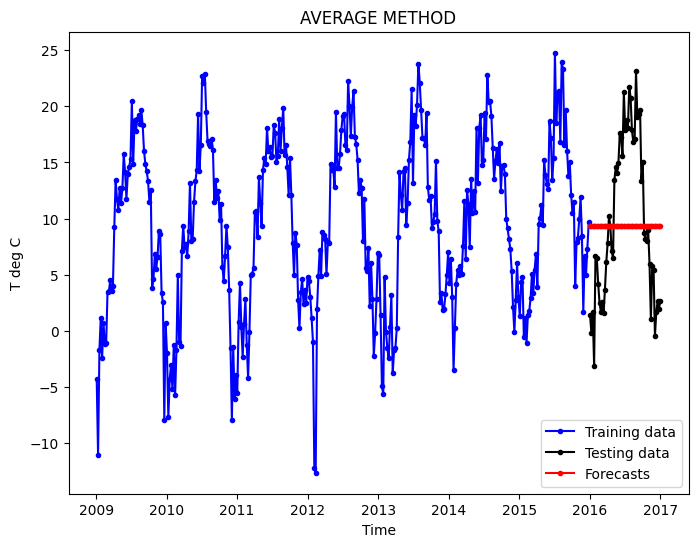

In [4]:
model_AVG = HistoricAverage()
model_AVG = model_AVG.fit(train_t)
forecast_model_AVG = model_AVG.predict(len(test_t))

#for the metrix i have to extract the values of the prediction
forecast_value = list(forecast_model_AVG.values())[0][0]

# series of the pred
forecast_series = np.full(len(test_t), forecast_value)

#PLOT
plt.figure(figsize=(8,6))
plt.plot(train_t, color='blue',marker = '.',label='Training data')
plt.plot(test_t, color='black', marker = '.',label='Testing data')
plt.plot(test_t.index,forecast_model_AVG['mean'], color='red', marker = '.', label='Forecasts' )
plt.xlabel('Time')
plt.ylabel('T deg C')
plt.title('AVERAGE METHOD')
plt.legend()
plt.show()


As we expected, the forecast are equal to the average of our train data, we can conclude that is not a good model for our data.

In [5]:
accuracy_simple_models_df=pd.concat([accuracy_simple_models_df, pd.DataFrame({'Model':'AVG method', 'RMSE':root_mean_squared_error(test_t, forecast_series), 'MAE':mean_absolute_error(test_t, forecast_series)},index=[0])], ignore_index=True)

## 2) **Naive method**

All forecasts are set to be equal to the value of the last observation. This method works well for many economic and financial time series. As a naive forecast is optimal when data follow a random walk, these are also called random walk forecasts.

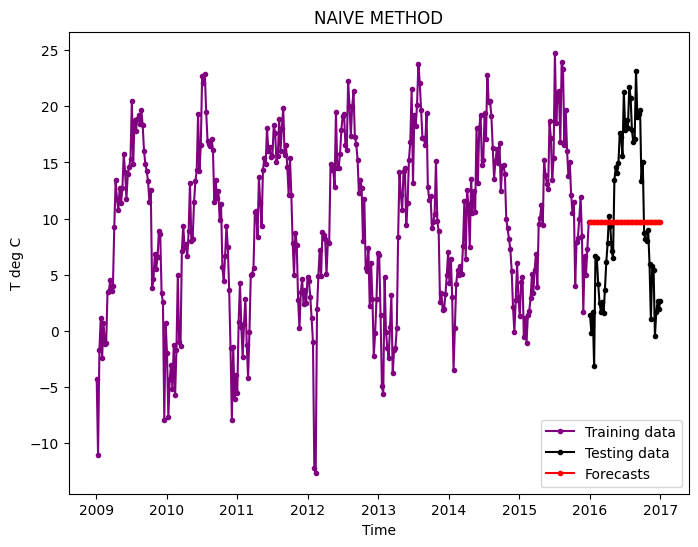

In [6]:
model_N = Naive()
model_N = model_N.fit(train_t)
forecast_N = model_N.predict(len(test_t)) 

#for the metrix i have to extract the values of the prediction
forecast_value_N = list(forecast_N.values())[0][0]

# series of the pred
forecast_series_N = np.full(len(test_t), forecast_value_N)

# PLOT

plt.figure(figsize=(8,6))
plt.plot(train_t, color='purple',marker = '.',label='Training data')
plt.plot(test_t, color='black', marker = '.',label='Testing data')
plt.plot(test_t.index, forecast_N['mean'], color='red', marker = '.', label='Forecasts' )
plt.xlabel('Time')
plt.ylabel('T deg C')
plt.title('NAIVE METHOD')
plt.legend()
plt.show()

All forecasts are set to be equal to the value of the last observation as we said before, again we can conclude that is not a good model for our data

In [7]:
accuracy_simple_models_df=pd.concat([accuracy_simple_models_df, pd.DataFrame({'Model':'NAIVE method', 'RMSE':root_mean_squared_error(test_t, forecast_series_N), 'MAE':mean_absolute_error(test_t, forecast_series_N)},index=[0])], ignore_index=True)

## 3) **Seasonal naive method**

Similar to naive but useful for highly seasonal data. In this case, we set each forecast to be equal to the last observed value from the previous season

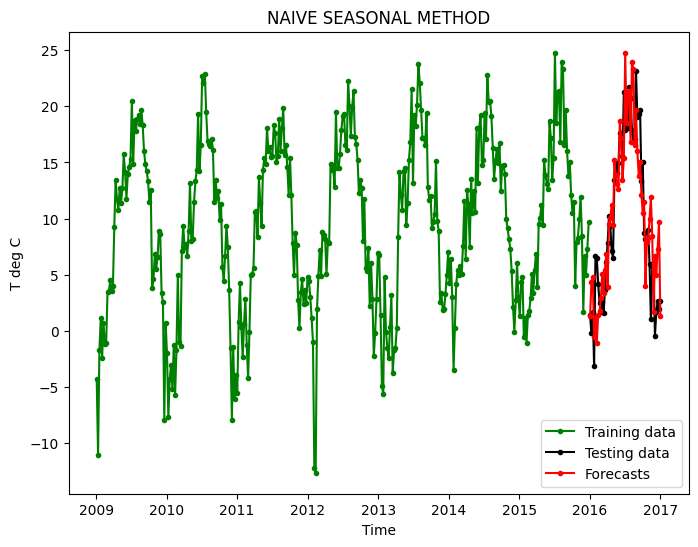

In [8]:
model_NS = SeasonalNaive(season_length=52) 
model_NS = model_NS.fit(train_t)
forecast_NS = model_NS.predict(len(test_t))

#for the metrix i have to extract the values of the prediction
forecast_value_SN = list(forecast_NS.values())[0][0]

# series of the pred
forecast_series_SN = np.full(len(test_t), forecast_value_SN)

# PLOT

plt.figure(figsize=(8,6))
plt.plot(train_t, color='green',marker = '.',label='Training data')
plt.plot(test_t, color='black', marker = '.',label='Testing data')
plt.plot(test_t.index, forecast_NS['mean'], color='red', marker = '.', label='Forecasts' )
plt.xlabel('Time')
plt.ylabel('T deg C')
plt.title('NAIVE SEASONAL METHOD')
plt.legend()
plt.show()

In this case for the nature of our data, strong seasonal component, this model provide us good results.

In [9]:
accuracy_simple_models_df=pd.concat([accuracy_simple_models_df, pd.DataFrame({'Model':'SEASONAL NAIVE method', 'RMSE':root_mean_squared_error(test_t, forecast_NS['mean']), 'MAE':mean_absolute_error(test_t, forecast_NS['mean'])},index=[0])], ignore_index=True)

## 4) **Drift method**

Variation on the naïve method to allow the forecasts to increase or decrease over time. The amount of change over time (drift) is set to be the average change seen in the historical data.

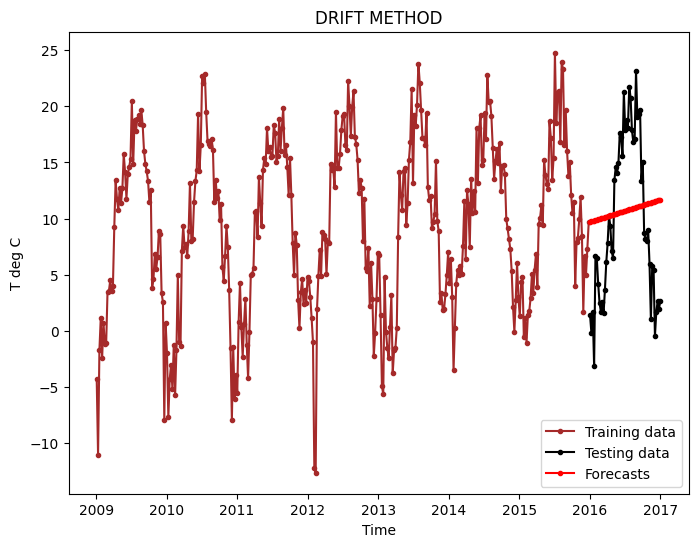

In [10]:
model_RW = RandomWalkWithDrift()
model_RW = model_RW.fit(train_t)
forecast_RW = model_RW.predict(len(test_t))

#for the metrix i have to extract the values of the prediction
forecast_value_RW = list(forecast_RW.values())[0][0]

# series of the pred
forecast_series_RW = np.full(len(test_t), forecast_value_RW)

#PLOT 
plt.figure(figsize=(8,6))
plt.plot(train_t, color='brown',marker = '.',label='Training data')
plt.plot(test_t, color='black', marker = '.',label='Testing data')
plt.plot(test_t.index, forecast_RW['mean'], color='red', marker = '.', label='Forecasts' )
plt.xlabel('Time')
plt.ylabel('T deg C')
plt.title('DRIFT METHOD')
plt.legend()
plt.show()

Again this models does not fit for our purpose.

In [11]:
accuracy_simple_models_df=pd.concat([accuracy_simple_models_df, pd.DataFrame({'Model':'DRIFT method', 'RMSE':root_mean_squared_error(test_t, forecast_series_RW), 'MAE':mean_absolute_error(test_t, forecast_series_RW)},index=[0])], ignore_index=True)

## SUMMARY - CONCLUSION 

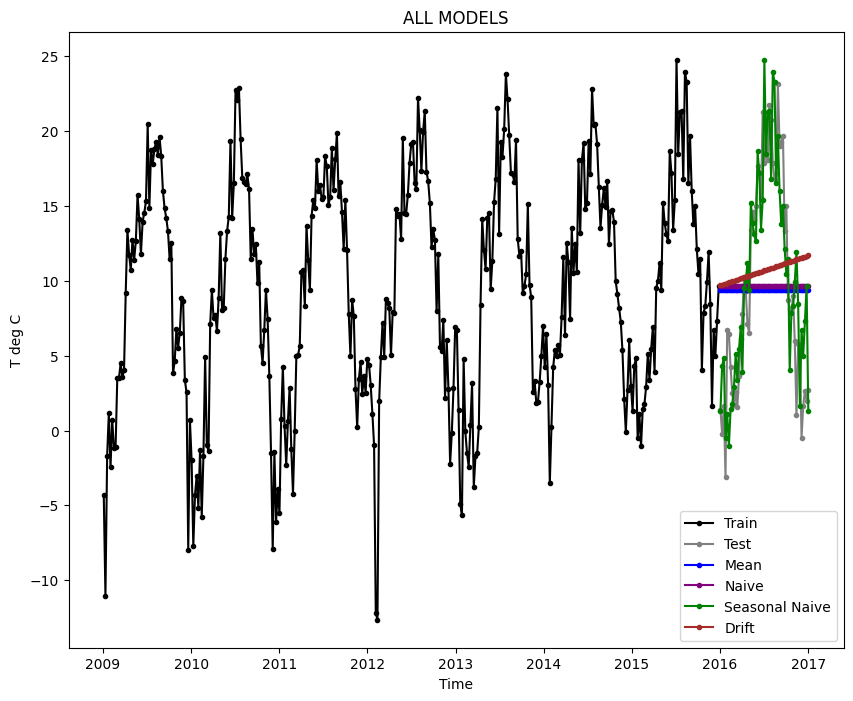

In [12]:
## SUMMARY OF ALL THIS MODELS
# Visualization
plt.figure(figsize=(10,8))
plt.plot(train_t.index, train_t, color='black',marker = '.',label='Train')
plt.plot(test_t.index, test_t, color='gray',marker = '.',label='Test')
plt.plot(test_t.index, forecast_model_AVG['mean'], color='blue',marker = '.', label='Mean')
plt.plot(test_t.index, forecast_N['mean'], color='purple',marker = '.', label='Naive')
plt.plot(test_t.index, forecast_NS['mean'], color='green',marker = '.', label='Seasonal Naive')
plt.plot(test_t.index, forecast_RW['mean'], color='brown',marker = '.', label='Drift')
plt.xlabel('Time')
plt.ylabel('T deg C')
plt.legend()
plt.title('ALL MODELS')
plt.show()

In [13]:
accuracy_simple_models_df

,Model,RMSE,MAE
0,AVG method,7.205823,6.352311
1,NAIVE method,7.190277,6.391985
2,SEASONAL NAIVE method,3.922163,3.131426
3,DRIFT method,7.189194,6.397049


**CONCLUSION:**

As we expected from the observation of the graphs, the best model is the **SEASONAL NAIVE**, also confirmed from our metrics above.